# COMPARE NETWORK ACCURACIES WITH DIFFERENT DATA AMOUNTS

Import necessary packages:

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from keras.callbacks import EarlyStopping
import ipywidgets as widgets

from pymoo_implementation.problem.problem_mlp_optimization import create_MLP_from_parameter, evaluate_MLP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import math
import copy
import string
from datetime import date
from typing import *
from sklearn.model_selection import train_test_split
import pickle
import time
import os

# Setup jupyter
%matplotlib inline

2023-02-14 13:26:05.174990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 13:26:05.295025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 13:26:05.295044: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 13:26:06.051232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Set constants:

In [2]:
# Data constants
PREFIX = "think_pad"
DATASET_NUMBER = 1

In [3]:
# System constants
PATH = (os.getcwd().replace("scripts", ""))
DATA_PATH = PATH + f"/data/random{DATASET_NUMBER}"

# Random seed
RANDOM_SEED = 42

# mlp setup constants
MAX_HIDDENLAYERS = 10
MAX_NEURON_PER_LAYER = 300
NUM_EPOCHS = 500 #100 # plot showed that no more than 40 epochs are necessary, else the network will be overfitting 

METRIC = "accuracy"

example = np.array([300, 300, 300, 300, 300])
original_data = pd.read_csv(DATA_PATH, delimiter='\t');  
today = date.today() 

PLOT_NAME = PATH + f"plots/{PREFIX}-set{DATASET_NUMBER}-{example}-{today}"
PICKLE_NAME = PATH + f"pickled_data/{PREFIX}-plot-data-set{DATASET_NUMBER}-{example}{today}.p"


Read the data:

In [4]:
def get_data(datacount:int):
    data = original_data.iloc[:
    datacount
    , 9:]
    input = data.iloc[:, :-9]
    target = data.iloc[:, -9:-7]

    return input, target

Method for plotting the accuracy history from the model training history:

In [5]:
# Method for plotting the accuracy history from the model training history
def plot_metric_history(history: tf.keras.callbacks.History, metric: str):
    n_epochs = len(history[metric])

    plt.plot(range(1, n_epochs + 1), history[metric], label=f'train {metric}')
    plt.plot(range(1, n_epochs + 1), history[f'val_{metric}'], label=f'validation {metric}')
    plt.ylim(0,1.0)
    plt.legend()
    plt.title(f'Training and validation {metric} for {n_epochs} epochs of training.')
    plt.show()

Store data as pickle and result plot as png:

In [6]:
def store_data_and_plots(accuracy_list, duration_list, data_count_list):
    pickle.dump([accuracy_list, duration_list, data_count_list], open(PICKLE_NAME, "wb"))

    figure, axis = plt.subplots(2,1)

    axis[0].plot(data_count_list[1:], accuracy_list[1:], label='accuracy', color = "blue")
    axis[0].plot(data_count_list[1:], np.ones(len(accuracy_list[1:])) * accuracy_list[0], label='500.000_data_accuracy', color = "red")

    axis[0].set_xlabel("instances of data")
    axis[0].set_ylabel("accuracy")
    axis[0].set_title(f"MLP-parameters: {example}")
    axis[0].grid(True)
    axis[0].legend()

    

    axis[1].plot(data_count_list[1:], duration_list[1:])
    axis[1].plot(data_count_list[1:], duration_list[1:], label='duration', color="blue")
    axis[1].plot(data_count_list[1:], np.ones(len(duration_list[1:])) * duration_list[0], label='500.000_data_duration', color = "red")
    axis[1].set_xlabel("instances of data")
    axis[1].set_ylabel("calculation time [min]")
    axis[1].grid(True)
    axis[1].legend()


    plt.tight_layout()
    plt.show()
    figure.savefig(f"{PLOT_NAME}.png")


Create, train and evaluate the MLP:

In [7]:
def train_network(start, end, step, accuracy_list, duration_list, data_count_list):
    time0 = time.time()
    cnn_model = create_MLP_from_parameter(example)
    for i in range(start, end, step):
        
        input, target = get_data(i)
        accuracy = - evaluate_MLP(cnn_model, example, input, target)[0]
        accuracy_list.append(accuracy)

        time_duration = (time.time() - time0) /60
        time0 = time.time()
        duration_list.append(time_duration)

        data_count_list.append(i)
        print (f"data_count: {i}, acc:{accuracy:0.03f}, time:{time_duration:0.03f} min")
    
    return (accuracy_list, duration_list, data_count_list)

Calculate accuracies for different data counts and store data for comparision:

2023-02-14 13:26:16.201130: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-14 13:26:16.201164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Maschine): /proc/driver/nvidia/version does not exist
2023-02-14 13:26:16.201951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


data_count: 500000, acc:0.937, time:56.796 min


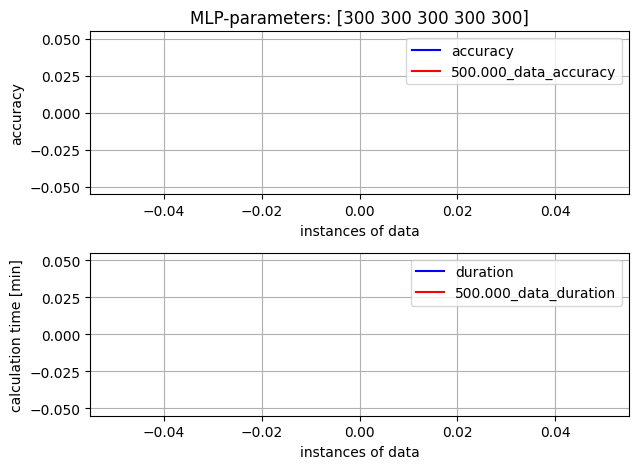

In [8]:
accuracy_list = []
duration_list = []
data_count_list = []

acc_res, duration_res, data_count_res = train_network(500000, 500001, 1, accuracy_list, duration_list, data_count_list)
store_data_and_plots(acc_res, duration_res, data_count_res)

data_count: 100, acc:0.800, time:0.029 min
data_count: 200, acc:0.800, time:0.022 min
data_count: 300, acc:0.433, time:0.027 min
data_count: 400, acc:0.325, time:0.035 min
data_count: 500, acc:0.800, time:0.070 min
data_count: 600, acc:0.650, time:0.050 min
data_count: 700, acc:0.786, time:0.114 min
data_count: 800, acc:0.944, time:0.141 min
data_count: 900, acc:0.956, time:0.086 min
data_count: 1000, acc:0.945, time:0.201 min
data_count: 1100, acc:0.950, time:0.090 min
data_count: 1200, acc:0.954, time:0.097 min
data_count: 1300, acc:0.908, time:0.104 min
data_count: 1400, acc:0.929, time:0.166 min
data_count: 1500, acc:0.940, time:0.119 min
data_count: 1600, acc:0.916, time:0.147 min
data_count: 1700, acc:0.924, time:0.178 min
data_count: 1800, acc:0.892, time:0.234 min
data_count: 1900, acc:0.903, time:0.246 min
data_count: 2000, acc:0.895, time:0.311 min
data_count: 2100, acc:0.929, time:0.163 min
data_count: 2200, acc:0.945, time:0.283 min
data_count: 2300, acc:0.963, time:0.624 m

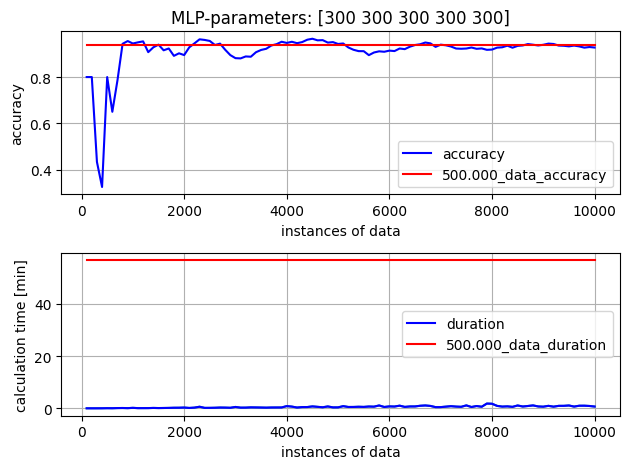

In [9]:
#accuracy_list, duration_list, data_count_list = pickle.load(open("/home/kassandra/GA_hyperparameter_optimization/pickled_data/thinkPad-plot-data-set1-[300 300 300 300 300]2023-02-14.p", "rb"))
acc_res, duration_res, data_count_res = train_network(100, 10100, 100, accuracy_list, duration_list, data_count_list)
store_data_and_plots(acc_res, duration_res, data_count_res)